<a href="https://colab.research.google.com/github/AditiG10/Classification-of-COVID-19-chest-X-ray-images/blob/master/Models1_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


Using TensorFlow backend.


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
!git clone https://github.com/vaibhavG321/Classification-of-COVID-19-chest-X-ray-images

Cloning into 'Classification-of-COVID-19-chest-X-ray-images'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 664 (delta 1), reused 2 (delta 0), pack-reused 656
Receiving objects: 100% (664/664), 222.69 MiB | 36.80 MiB/s, done.
Resolving deltas: 100% (29/29), done.
Checking out files: 100% (698/698), done.


In [4]:
cd Classification-of-COVID-19-chest-X-ray-images 

/content/Classification-of-COVID-19-chest-X-ray-images


In [5]:
cd dataset

/content/Classification-of-COVID-19-chest-X-ray-images/dataset


In [6]:
cd training

/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training


In [7]:
!ls

infected  normal


In [8]:
train_normal_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal'
train_infected_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected'
test_normal_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/normal'
test_infected_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/infected'
evaluate_normal_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/normal'
evaluate_infected_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/infected'

In [9]:
print('train_normal cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal')))
print('train_infected cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected')))
print('test_normal cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/normal')))
print('test_infected cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/infected')))
print('evaluate_normal cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/normal')))
print('evaluate_infected cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/infected')))

train_normal cases  297
train_infected cases  296
test_normal cases  69
test_infected cases  25
evaluate_normal cases  1
evaluate_infected cases  1


In [10]:
IMAGE_SIZE = (224,224)
DIR_NAME = '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/'
IMAGE_DIR = DIR_NAME + 'normal/'
imagePaths=[]
for dirname, _, filenames in os.walk(DIR_NAME):
    for filename in filenames:
      imagePaths.append(os.path.join(dirname, filename))

In [11]:
imagePaths

['/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/infected/1.jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/normal/1.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/infected/all14238-fig-0001-m-c.jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/infected/kjr-21-e24-g002-l-a.jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/infected/covid-19-pneumonia-8.jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/infected/41591_2020_819_Fig1_HTML.webp-day10.png',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/infected/gr1_lrg-b.jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/infected/58cb9263f16e94305c730685358e4e_jumbo.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/infected/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg',
 '/content/Cla

In [12]:
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 1]
data = np.array(data) / 255.0
labels = np.array(labels)

In [13]:
data.shape

(689, 224, 224, 3)

In [14]:
labels

array(['infected', 'normal', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'no

In [15]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)
# initialize the training data augmentation object
trainAug = ImageDataGenerator(shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,	rotation_range=15,
	fill_mode="nearest")

In [16]:
trainY.argmax(axis=1)

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,

In [17]:


trainX.shape,testX.shape,trainY.shape,testY.shape



((551, 224, 224, 3), (138, 224, 224, 3), (551, 2), (138, 2))

# VGG16

In [18]:
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [19]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [20]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 3e-4
EPOCHS = 30
BS = 10
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
55/55 [==============================] - 337s 6s/step - loss: 0.7315 - accuracy: 0.5397 - val_loss: 0.5906 - val_accuracy: 0.8043
Epoch 2/30
55/55 [==============================] - 346s 6s/step - loss: 0.5948 - accuracy: 0.6927 - val_loss: 0.4839 - val_accuracy: 0.8623
Epoch 3/30
55/55 [==============================] - 335s 6s/step - loss: 0.4904 - accuracy: 0.8041 - val_loss: 0.4215 - val_accuracy: 0.8623
Epoch 4/30
55/55 [==============================] - 339s 6s/step - loss: 0.4192 - accuracy: 0.8743 - val_loss: 0.3701 - val_accuracy: 0.9130
Epoch 5/30
55/55 [==============================] - 335s 6s/step - loss: 0.4007 - accuracy: 0.8577 - val_loss: 0.3354 - val_accuracy: 0.9130
Epoch 6/30
55/55 [==============================] - 337s 6s/step - loss: 0.3352 - accuracy: 0.8909 - val_loss: 0.3226 - val_accuracy: 0.8696
Epoch 7/30
55/55 [==========

In [21]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.95      0.91      0.93        64
      normal       0.92      0.96      0.94        74

    accuracy                           0.93       138
   macro avg       0.94      0.93      0.93       138
weighted avg       0.94      0.93      0.93       138



In [22]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[58  6]
 [ 3 71]]
acc: 0.9348
sensitivity: 0.9062
specificity: 0.9595


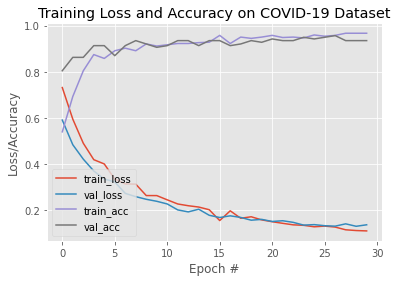

In [23]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [24]:
predIdxs

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1])

In [25]:
predict_imagePaths=['/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (32).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (42).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (180).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0339-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0019-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0323-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0370-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (79).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (28).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (71).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train11.png',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (43).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (30).jpeg']
# loop over the image paths
for imagePath in predict_imagePaths:
	# extract the class label from the filename
#	label = imagePath.split(os.path.sep)[-2]
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  img = np.array(image) / 255.0
  img=np.reshape(img,(1,224,224,3))
  print(model.predict(img).argmax(axis=1))

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]


In [26]:
img.shape

(1, 224, 224, 3)

# ResNet152V2

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,ResNet152V2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [28]:
res =ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
outputs = res.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)
model = Model(inputs=res.input, outputs=outputs)
for layer in res.layers:
  layer.trainable = False

234553344/234545216 [==============================] - 2s 0us/step


In [29]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 3e-4
EPOCHS = 30
BS = 10
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/30
55/55 [==============================] - 243s 4s/step - loss: 0.1761 - accuracy: 0.9335 - val_loss: 0.0841 - val_accuracy: 0.9783
Epoch 2/30
55/55 [==============================] - 241s 4s/step - loss: 0.0378 - accuracy: 0.9908 - val_loss: 0.0370 - val_accuracy: 0.9710
Epoch 3/30
55/55 [==============================] - 240s 4s/step - loss: 0.0724 - accuracy: 0.9815 - val_loss: 0.0682 - val_accuracy: 0.9855
Epoch 4/30
55/55 [==============================] - 241s 4s/step - loss: 0.0449 - accuracy: 0.9873 - val_loss: 0.0500 - val_accuracy: 0.9928
Epoch 5/30
55/55 [==============================] - 241s 4s/step - loss: 0.0535 - accuracy: 0.9908 - val_loss: 0.1091 - val_accuracy: 0.9710
Epoch 6/30
55/55 [==============================] - 242s 4s/step - loss: 0.0807 - accuracy: 0.9834 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 7/30
55/55 [==============================] - 237s 4s/step - loss: 0.0542 - accuracy: 0.9852 - val

In [32]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))




[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       1.00      0.98      0.99        64
      normal       0.99      1.00      0.99        74

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138



In [33]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[63  1]
 [ 0 74]]
acc: 0.9928
sensitivity: 0.9844
specificity: 1.0000


ValueError: ignored

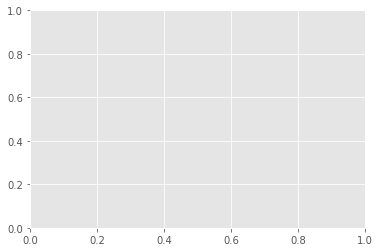

In [35]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [36]:
predIdxs

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1])

In [37]:
predict_imagePaths=['/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (32).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (42).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (180).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0339-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0019-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0323-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0370-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (79).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (28).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (71).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train11.png',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (43).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (30).jpeg']
# loop over the image paths
for imagePath in predict_imagePaths:
	# extract the class label from the filename
#	label = imagePath.split(os.path.sep)[-2]
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  img = np.array(image) / 255.0
  img=np.reshape(img,(1,224,224,3))
  print(model.predict(img).argmax(axis=1))

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]


In [38]:
img.shape

(1, 224, 224, 3)